# File operations

**Download Testcases**

In [ ]:
try:
  f = open('/content/tb/ref1.dat','r')
  f.close()
except IOError:
  !gdown '1yO5qrwHmyQesHdVVINnedDPduedV5Pl2' --output tb.zip
  !unzip tb.zip

**Open Reference and Query**

In [ ]:
tb = 4
ref_name = "ref"+str(tb)+".dat"
query_name = "query"+str(tb)+".dat"

with open('/content/tb/' + ref_name) as ref_file:
  ref_array = ref_file.read().splitlines()

with open('/content/tb/' + query_name) as query_file:
  query_array = query_file.read().splitlines()

REF, QUE = len(ref_array), len(query_array) # REF > QUE
print("Finished reading files.")

Finished reading files.


# Smith Waterman

In [ ]:
# initialize
import math
I = [[-math.inf for x in range(REF + 1)] for y in range(QUE + 1)]
D = [[-math.inf for x in range(REF + 1)] for y in range(QUE + 1)]
H = [[0 for x in range(REF + 1)] for y in range(QUE + 1)]

# path
P = [[0 for x in range(REF)] for y in range(QUE)]

print("Finished initializing matrixes.")

Finished initializing matrixes.


In [ ]:
# algorithm
import math
import time
import tracemalloc

start_time = time.time()
tracemalloc.start()

PE = 16
ROUND = int(REF * QUE / PE + (PE - 1))

max_v = -math.inf
max_i = -1
max_j = -1

for r in range(ROUND):
  for p in range(PE):
    if (r >= p) and (r <= ROUND - PE + p):
      i = (r - p) % REF + 1
      j = (p + 1) + math.floor((r - p) / REF) * PE
    else:
      i = -1
      j = -1

    if (i != -1) and (j != -1):
      P[j - 1][i - 1] = r

      I[j][i] = max(H[j-1][i] - 2, I[j-1][i] - 1)
      D[j][i] = max(H[j][i-1] - 2, D[j][i-1] - 1)
      if (ref_array[i - 1] == query_array[j - 1]):
        H[j][i] = max(H[j-1][i-1] + 2, I[j][i], D[j][i], 0)
      else:
        H[j][i] = max(H[j-1][i-1] - 1, I[j][i], D[j][i], 0)

      if (H[j][i] > max_v):
        max_v = H[j][i]
        max_i = i
        max_j = j

print("Finished executing SW algorithm.\n")
t_SW = (time.time() - start_time)
m_SW = tracemalloc.get_traced_memory()
print("time: %s s" % t_SW)
print("memory: (current, peak) = ",m_SW, "KB")
tracemalloc.stop()

Finished executing SW algorithm.

time: 0.017696857452392578 s
memory: (current, peak) =  (1844, 32537) KB


In [ ]:
# result
print("Showing the SW results ...\n")

max_SW = max_v
i_SW = max_i
j_SW = max_j

print("max score:", max_v)
print("max pos: (REF, QUE) =", (max_i,max_j))

Showing the SW results ...

max score: 25
max pos: (REF, QUE) = (43, 48)


Showing the SW path ...



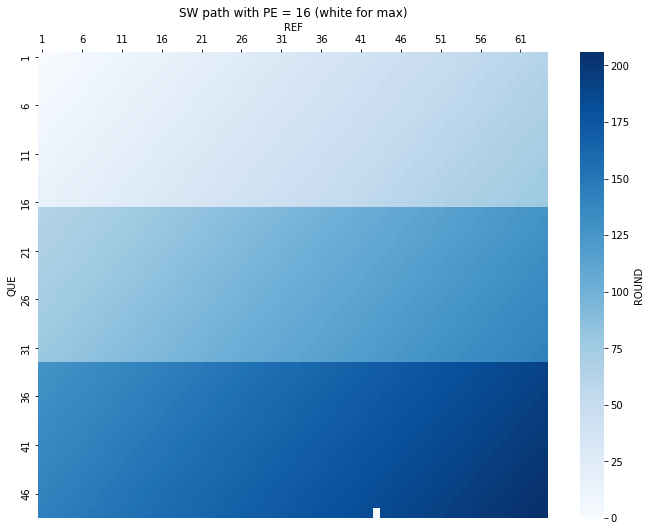

In [ ]:
# path plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

P[max_j - 1][max_i - 1] = 0

P_SW = P

df_cm = pd.DataFrame(P, index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

print("Showing the SW path ...\n")
plt.figure(figsize = (20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax = plt.axes()

sn.heatmap(df_cm, cmap="Blues", ax=ax, cbar_kws={'label': 'ROUND'}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100))
ax.set_title('SW path with PE = '+str(PE)+' (white for max)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set(xlabel='REF', ylabel='QUE');

Showing the SW score ...



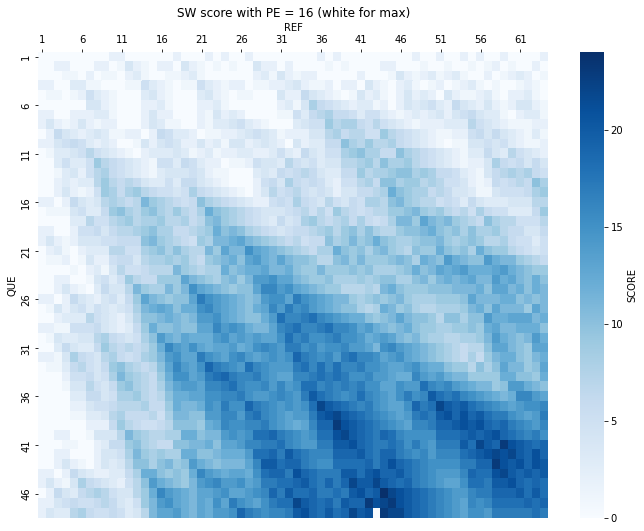

In [ ]:
# path plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import numpy as np

H_np = np.array(H)
H_np[max_j][max_i] = 0

H_SW = H_np

df_cm = pd.DataFrame(H_np[1:,1:], index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

print("Showing the SW score ...\n")
plt.figure(figsize = (20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax = plt.axes()

sn.heatmap(df_cm, cmap="Blues", ax=ax, cbar_kws={'label': 'SCORE'}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100))
ax.set_title('SW score with PE = '+str(PE)+' (white for max)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set(xlabel='REF', ylabel='QUE');

# Banded Smith Waterman

In [ ]:
# initialize
import math
I = [[-math.inf for x in range(REF + 1)] for y in range(QUE + 1)]
D = [[-math.inf for x in range(REF + 1)] for y in range(QUE + 1)]
H = [[0 for x in range(REF + 1)] for y in range(QUE + 1)]

# path
P = [[0 for x in range(REF)] for y in range(QUE)]

print("Finished initializing matrixes.")

Finished initializing matrixes.


In [ ]:
# algorithm
import math
import time
import tracemalloc

start_time = time.time()
tracemalloc.start()

PE = 16
# ROUND = int((PE - 1) + 2*(QUE - PE) + REF - (QUE - PE))
round = 0
counter = 0
direct = [1 for p in range(REF + QUE)]

max_v = -math.inf
max_i = -1
max_j = -1

pos_i = [-1 for p in range(PE)]
pos_j = [-1 for p in range(PE)]

while (pos_i[0] + pos_j[0] <= REF + QUE):
  middle = pos_j[PE//2]

  for p in range(PE):
    if (round < PE) and (round >= p):
      pos_i[p] = round - p + 1
      pos_j[p] = p + 1
    
    # elif (round <= REF - PE - 1) and (round >= PE - 1 + REF - QUE):
    elif (middle == QUE // 2) and (counter <= REF - QUE - 1):
      pos_i[p] = pos_i[p] + 1
      if (p == PE - 1):
        counter = counter + 1
    
    else:
      if (direct[round - 1] == 1):
        pos_j[p] = pos_j[p] + 1
        direct[round] = 0
      else:
        pos_i[p] = pos_i[p] + 1
        direct[round] = 1
    
    if (pos_i[p] <= REF) and (pos_j[p] <= QUE) and (pos_i[p] != -1) and (pos_j[p] != -1):
      P[pos_j[p] - 1][pos_i[p] - 1] = round

      I[pos_j[p]][pos_i[p]] = max(H[pos_j[p]-1][pos_i[p]] - 2, I[pos_j[p]-1][pos_i[p]] - 1)
      D[pos_j[p]][pos_i[p]] = max(H[pos_j[p]][pos_i[p]-1] - 2, D[pos_j[p]][pos_i[p]-1] - 1)
        
      if (ref_array[pos_i[p] - 1] == query_array[pos_j[p] - 1]):
        H[pos_j[p]][pos_i[p]] = max(H[pos_j[p]-1][pos_i[p]-1] + 2, I[pos_j[p]][pos_i[p]], D[pos_j[p]][pos_i[p]], 0)
          
      else:
        H[pos_j[p]][pos_i[p]] = max(H[pos_j[p]-1][pos_i[p]-1] - 1, I[pos_j[p]][pos_i[p]], D[pos_j[p]][pos_i[p]], 0)
          
      if (H[pos_j[p]][pos_i[p]] > max_v):
        max_v = H[pos_j[p]][pos_i[p]]
        max_i = pos_i[p]
        max_j = pos_j[p]

  round = round + 1

print("Finished executing Banded-SW algorithm.\n")
t_BSW = (time.time() - start_time)
m_BSW = tracemalloc.get_traced_memory()
print("time: %s s" % (t_BSW))
print("memory: (current, peak) = ",m_BSW, "KB")
tracemalloc.stop()

Finished executing Banded-SW algorithm.

time: 0.010124921798706055 s
memory: (current, peak) =  (3940, 50957) KB


In [ ]:
# result
print("Showing the Banded-SW results ...\n")

max_BSW = max_v
i_BSW = max_i
j_BSW = max_j

print("max score:", max_v)
print("max pos: (REF, QUE) =", (max_i,max_j))

Showing the Banded-SW results ...

max score: 23
max pos: (REF, QUE) = (38, 39)


Showing the Banded-SW path ...



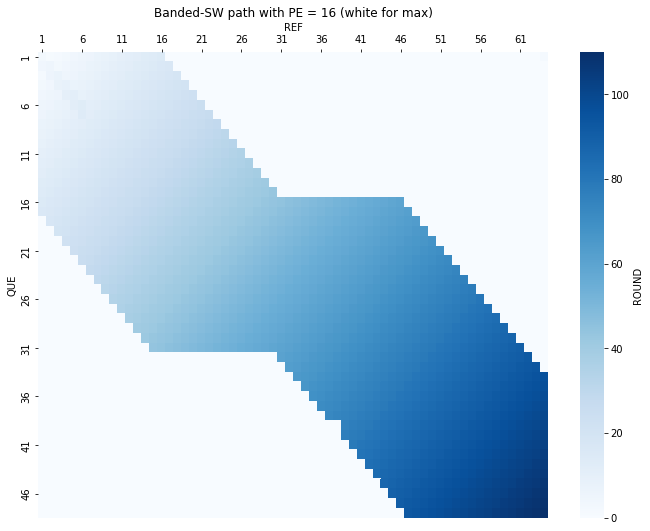

In [ ]:
# path plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

P[max_j - 1][max_i - 1] = 0

P_BSW = P

df_cm = pd.DataFrame(P, index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

print("Showing the Banded-SW path ...\n")
plt.figure(figsize = (20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax = plt.axes()

sn.heatmap(df_cm, cmap="Blues", ax=ax, cbar_kws={'label': 'ROUND'}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100))
ax.set_title('Banded-SW path with PE = '+str(PE)+' (white for max)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set(xlabel='REF', ylabel='QUE');

Showing the Banded-SW score ...



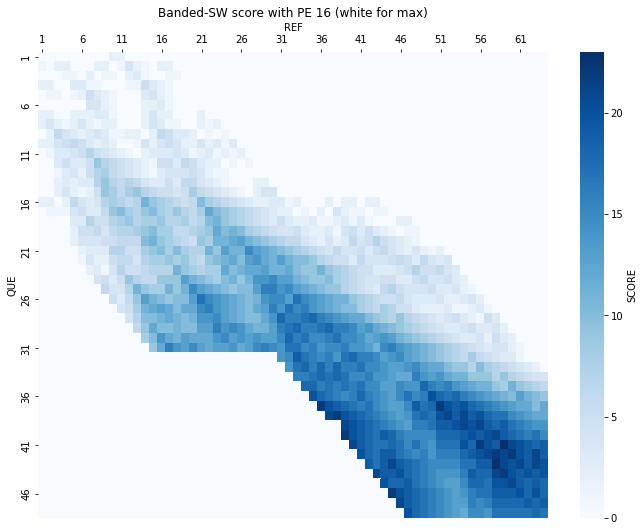

In [ ]:
# score plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import numpy as np

H_np = np.array(H)
H_np[max_j][max_i] = 0

H_BSW = H_np

df_cm = pd.DataFrame(H_np[1:,1:], index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

print("Showing the Banded-SW score ...\n")
plt.figure(figsize = (20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax = plt.axes()

sn.heatmap(df_cm, cmap="Blues", ax=ax, cbar_kws={'label': 'SCORE'}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100))
ax.set_title('Banded-SW score with PE '+str(PE)+' (white for max)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set(xlabel='REF', ylabel='QUE');

# Revised Banded Smith Waterman

In [ ]:
# initialize
import math
I = [[-math.inf for x in range(REF + 1)] for y in range(QUE + 1)]
D = [[-math.inf for x in range(REF + 1)] for y in range(QUE + 1)]
H = [[0 for x in range(REF + 1)] for y in range(QUE + 1)]

# path
P = [[0 for x in range(REF)] for y in range(QUE)]

print("Finished initializing matrixes.")

Finished initializing matrixes.


In [ ]:
# algorithm
import math
import time
import tracemalloc

start_time = time.time()
tracemalloc.start()

PE = 16

# position
pos_i = [-1 for p in range(PE)]
pos_j = [-1 for p in range(PE)]
direct = [1 for p in range(REF + QUE)]

max_v = -math.inf
max_i = -1
max_j = -1
round = 0

while not(pos_j[0] > QUE or pos_i[PE - 1] > REF):
  if (round < PE):
    for p in range(PE):
      if (round >= p):
        pos_i[p] = round - p + 1
        pos_j[p] = p + 1
  
  elif (pos_j[PE - 1] < QUE) and (pos_i[0] < REF):
    sum0 = 0
    sum15 = 0

    for p in range(PE):
      if (p < PE/2): # PE % 2 = 0
        sum0 = sum0 + H[pos_j[p]][pos_i[p]]
      else:
        sum15 = sum15 + H[pos_j[p]][pos_i[p]]

    for p in range(PE):
      if(sum0 < sum15 - 2):
        pos_j[p] = pos_j[p] + 1
        direct[round] = 0
      elif(sum0 - 2> sum15):
        pos_i[p] = pos_i[p] + 1
        direct[round] = 1
      else:
        if (direct[round - 1] == 1):
          pos_j[p] = pos_j[p] + 1
          direct[round] = 0
        else:
          pos_i[p] = pos_i[p] + 1
          direct[round] = 1
    
  elif (pos_i[0] == REF):
    for p in range(PE):
      pos_j[p] = pos_j[p] + 1
  
  else:
    for p in range(PE):
      pos_i[p] = pos_i[p] + 1

  for p in range(PE):
    if (pos_i[p] <= REF) and (pos_j[p] <= QUE) and (pos_i[p] != -1) and (pos_j[p] != -1):
      P[pos_j[p] - 1][pos_i[p] - 1] = round

      I[pos_j[p]][pos_i[p]] = max(H[pos_j[p]-1][pos_i[p]] - 2, I[pos_j[p]-1][pos_i[p]] - 1)
      D[pos_j[p]][pos_i[p]] = max(H[pos_j[p]][pos_i[p]-1] - 2, D[pos_j[p]][pos_i[p]-1] - 1)
        
      if (ref_array[pos_i[p] - 1] == query_array[pos_j[p] - 1]):
        H[pos_j[p]][pos_i[p]] = max(H[pos_j[p]-1][pos_i[p]-1] + 2, I[pos_j[p]][pos_i[p]], D[pos_j[p]][pos_i[p]], 0)
          
      else:
        H[pos_j[p]][pos_i[p]] = max(H[pos_j[p]-1][pos_i[p]-1] - 1, I[pos_j[p]][pos_i[p]], D[pos_j[p]][pos_i[p]], 0)
          
      if (H[pos_j[p]][pos_i[p]] > max_v):
        max_v = H[pos_j[p]][pos_i[p]]
        max_i = pos_i[p]
        max_j = pos_j[p]

  round = round + 1

print("Finished executing Revised Banded-SW algorithm.\n")
t_RBSW = (time.time() - start_time)
m_RBSW = tracemalloc.get_traced_memory()
print("time: %s s" % (t_RBSW))
print("memory: (current, peak) = ",m_RBSW, "KB")
tracemalloc.stop()

Finished executing Revised Banded-SW algorithm.

time: 0.00997471809387207 s
memory: (current, peak) =  (5220, 71019) KB


In [ ]:
# result
print("Showing the Revised Banded-SW results ...\n")

max_RBSW = max_v
i_RBSW = max_i
j_RBSW = max_j

print("max score:", max_v)
print("max pos: (REF, QUE) =", (max_i,max_j))

Showing the Revised Banded-SW results ...

max score: 25
max pos: (REF, QUE) = (43, 48)


Showing the Revised Banded-SW path ...



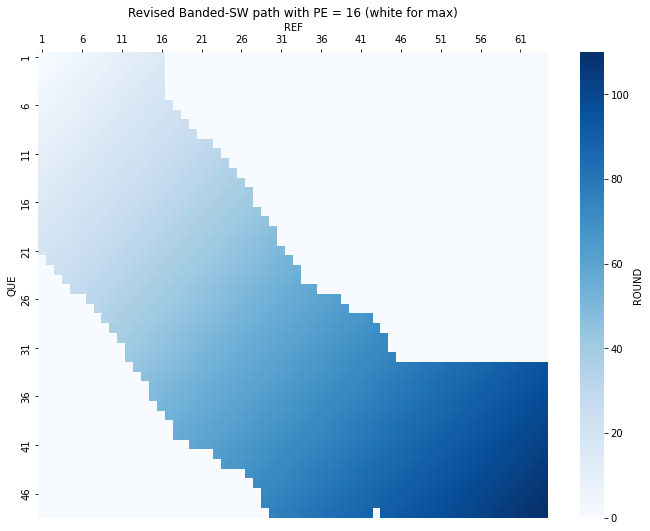

In [ ]:
# path plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

P[max_j - 1][max_i - 1] = 0

P_RBSW = P

df_cm = pd.DataFrame(P, index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

print("Showing the Revised Banded-SW path ...\n")
plt.figure(figsize = (20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax = plt.axes()

sn.heatmap(df_cm, cmap="Blues", ax=ax, cbar_kws={'label': 'ROUND'}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100))
ax.set_title('Revised Banded-SW path with PE = '+str(PE)+' (white for max)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set(xlabel='REF', ylabel='QUE');

Showing the Revised Banded-SW score ...



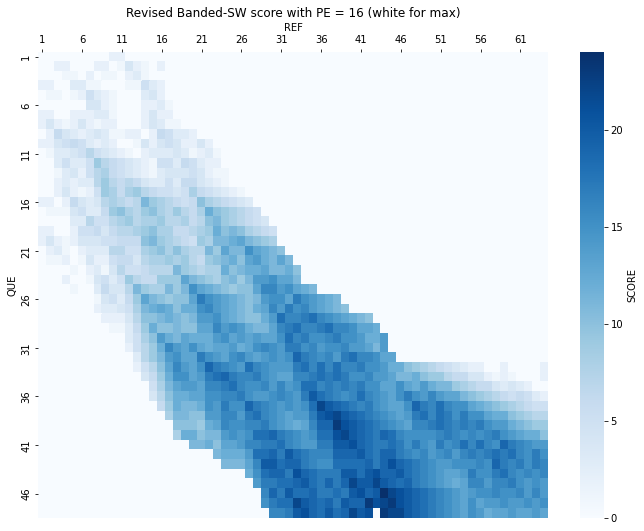

In [ ]:
# score plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import numpy as np

H_np = np.array(H)
H_np[max_j][max_i] = 0

H_RBSW = H_np

df_cm = pd.DataFrame(H_np[1:,1:], index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

print("Showing the Revised Banded-SW score ...\n")
plt.figure(figsize = (20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax = plt.axes()

sn.heatmap(df_cm, cmap="Blues", ax=ax, cbar_kws={'label': 'SCORE'}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100))
ax.set_title('Revised Banded-SW score with PE = '+str(PE)+' (white for max)')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 
ax.set(xlabel='REF', ylabel='QUE');

# Comparison

In [ ]:
print("Comparing the Time and Memory...\n")
print('{0: <15}'.format('Algorithm'),"|",'{0: <25}'.format('Time (s)'),"|",'{0: <25}'.format('Memory(cur, peak) (KB)'))
print('{0: <15}'.format('SW'),"|",'{0: <25}'.format(str(t_SW)),"|",'{0: <25}'.format(str(m_SW)))
print('{0: <15}'.format('BSW'),"|",'{0: <25}'.format(str(t_BSW)),"|",'{0: <25}'.format(str(m_BSW)))
print('{0: <15}'.format('RBSW'),"|",'{0: <25}'.format(str(t_RBSW)),"|",'{0: <25}'.format(str(m_RBSW)))

Comparing the Time and Memory...

Algorithm       | Time (s)                  | Memory(cur, peak) (KB)   
SW              | 0.017696857452392578      | (1844, 32537)            
BSW             | 0.010124921798706055      | (3940, 50957)            
RBSW            | 0.00997471809387207       | (5220, 71019)            


In [ ]:
print("Comparing the Score and Position...\n")
print('{0: <15}'.format('Algorithm'),"|",'{0: <25}'.format('Max Score'),"|",'{0: <25}'.format('Max pos(ref, que)'))
print('{0: <15}'.format('SW'),"|",'{0: <25}'.format(str(max_SW)),"|",'{0: <25}'.format("("+str(i_SW)+","+str(j_SW)+")"))
print('{0: <15}'.format('BSW'),"|",'{0: <25}'.format(str(max_BSW)),"|",'{0: <25}'.format("("+str(i_BSW)+","+str(j_BSW)+")"))
print('{0: <15}'.format('RBSW'),"|",'{0: <25}'.format(str(max_RBSW)),"|",'{0: <25}'.format("("+str(i_RBSW)+","+str(j_RBSW)+")"))

Comparing the Score and Position...

Algorithm       | Max Score                 | Max pos(ref, que)        
SW              | 25                        | (43,48)                  
BSW             | 23                        | (38,39)                  
RBSW            | 25                        | (43,48)                  


Comparing the Path...



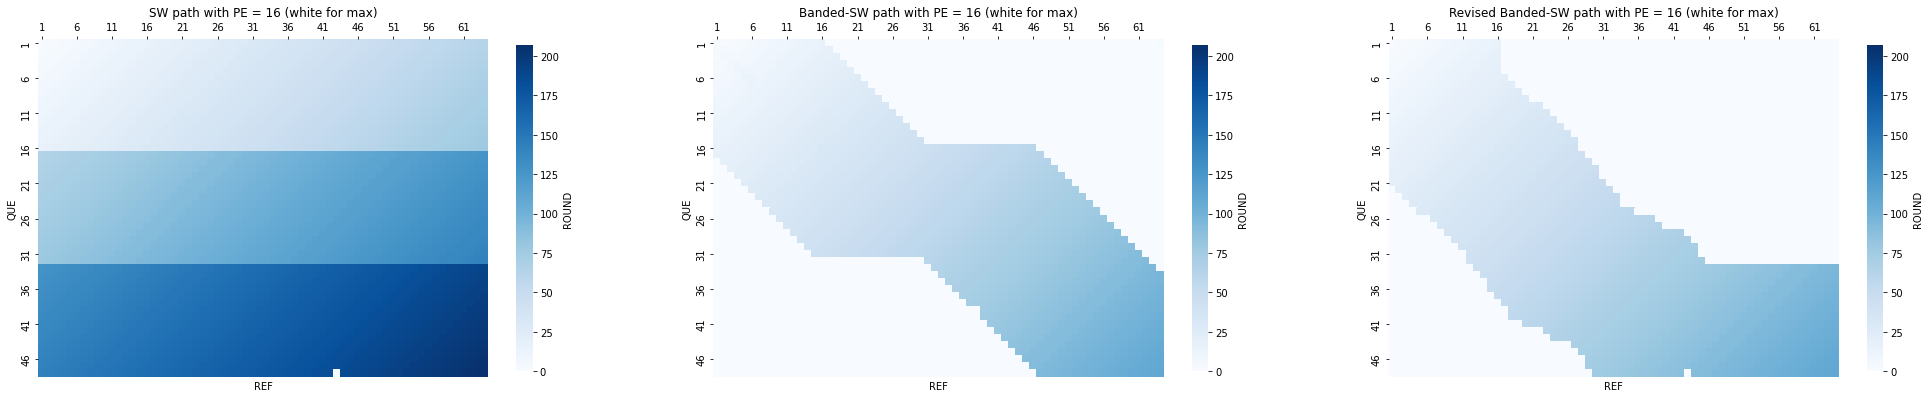

In [ ]:
# path plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

print("Comparing the Path...\n")

fig, axes = plt.subplots(ncols=3, figsize=(3*20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax1, ax2, ax3 = axes

df_sw = pd.DataFrame(P_SW, index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])
df_bsw = pd.DataFrame(P_BSW, index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])
df_rbsw = pd.DataFrame(P_RBSW, index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

im1 = ax1.matshow(df_sw.corr())
im2 = ax2.matshow(df_bsw.corr())
im3 = ax3.matshow(df_rbsw.corr())

sn.heatmap(df_sw, cmap="Blues", ax=ax1, cbar_kws={'label': 'ROUND', "shrink": 0.7}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100), vmax = int(REF * QUE / PE + (PE - 1)))
ax1.set_title('SW path with PE = 16 (white for max)')
ax1.xaxis.tick_top()
# ax1.xaxis.set_label_position('top')
ax1.set(xlabel='REF', ylabel='QUE');

sn.heatmap(df_bsw, cmap="Blues", ax=ax2, cbar_kws={'label': 'ROUND', "shrink": 0.7}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100), vmax = int(REF * QUE / PE + (PE - 1)))
ax2.set_title('Banded-SW path with PE = 16 (white for max)')
ax2.xaxis.tick_top()
# ax2.xaxis.set_label_position('top') 
ax2.set(xlabel='REF', ylabel='QUE');

sn.heatmap(df_rbsw, cmap="Blues", ax=ax3, cbar_kws={'label': 'ROUND', "shrink": 0.7}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100), vmax = int(REF * QUE / PE + (PE - 1)))
ax3.set_title('Revised Banded-SW path with PE = 16 (white for max)')
ax3.xaxis.tick_top()
# ax3.xaxis.set_label_position('top') 
ax3.set(xlabel='REF', ylabel='QUE');


Comparing the Score...



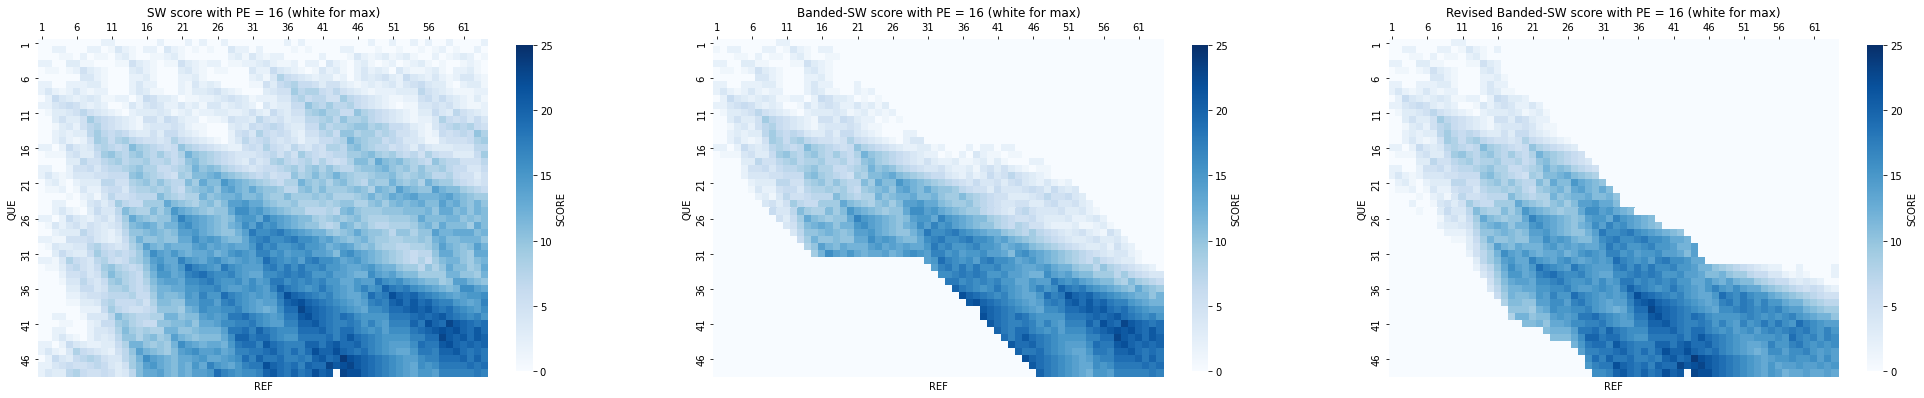

In [ ]:
# path plot
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

print("Comparing the Score...\n")

max_score = max(max_SW,max_BSW,max_RBSW)

fig, axes = plt.subplots(ncols=3, figsize=(3*20*REF/(REF+QUE),20*QUE/(REF+QUE)))
ax1, ax2, ax3 = axes

df_sw = pd.DataFrame(H_SW[1:,1:], index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])
df_bsw = pd.DataFrame(H_BSW[1:,1:], index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])
df_rbsw = pd.DataFrame(H_RBSW[1:,1:], index = [i for i in range(1,QUE + 1)], columns = [i for i in range(1,REF + 1)])

im1 = ax1.matshow(df_sw.corr())
im2 = ax2.matshow(df_bsw.corr())
im3 = ax3.matshow(df_rbsw.corr())

sn.heatmap(df_sw, cmap="Blues", ax=ax1, cbar_kws={'label': 'SCORE', "shrink": 0.7}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100), vmax = max_score)
ax1.set_title('SW score with PE = 16 (white for max)')
ax1.xaxis.tick_top()
# ax1.xaxis.set_label_position('top') 
ax1.set(xlabel='REF', ylabel='QUE');

sn.heatmap(df_bsw, cmap="Blues", ax=ax2, cbar_kws={'label': 'SCORE', "shrink": 0.7}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100), vmax = max_score)
ax2.set_title('Banded-SW score with PE = 16 (white for max)')
ax2.xaxis.tick_top()
# ax2.xaxis.set_label_position('top') 
ax2.set(xlabel='REF', ylabel='QUE');

sn.heatmap(df_rbsw, cmap="Blues", ax=ax3, cbar_kws={'label': 'SCORE', "shrink": 0.7}, xticklabels = 5*math.ceil(REF/100), yticklabels = 5*math.ceil(REF/100), vmax = max_score)
ax3.set_title('Revised Banded-SW score with PE = 16 (white for max)')
ax3.xaxis.tick_top()
# ax3.xaxis.set_label_position('top') 
ax3.set(xlabel='REF', ylabel='QUE');
